# Genes shared by free-living species

excluding host-associated diplomonads

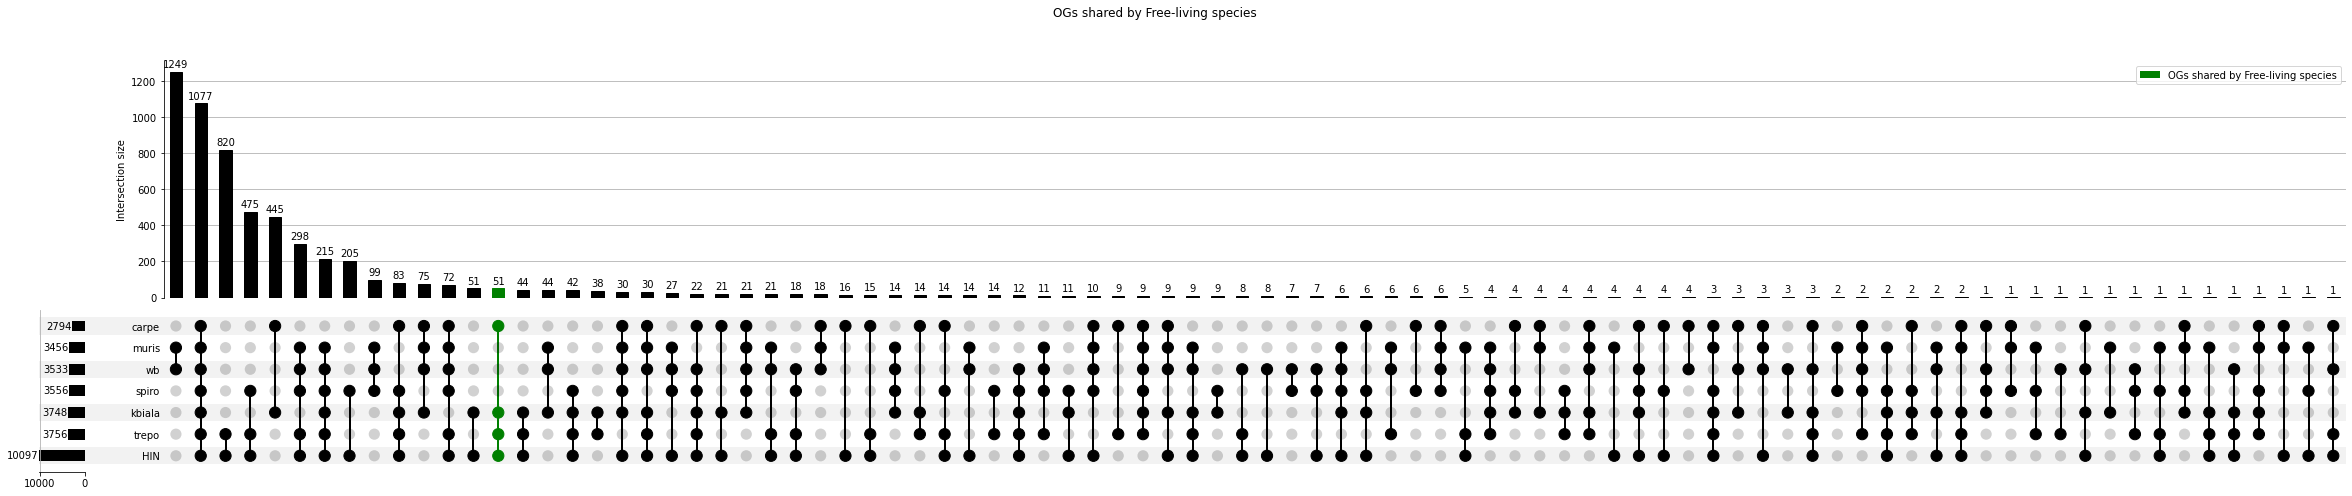

In [2]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")


upset.style_subsets(absent=["spiro", "wb", "muris"],
                    min_degree=4,
                    facecolor="green",
                    label="OGs shared by Free-living species")

upset.plot()
plt.suptitle("OGs shared by Free-living species")
plt.show()

## Extract genes from OGs

In [3]:
"OG shared by Free-livings HIN, trepo, kbiala, carpe"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_fl=df[(df.iloc[:,[1,2,6,7]] >=1).all(1)  & (df.iloc[:,[3,4,5]] ==0).all(1)]

print("Number of OGs= ", len(og_fl["Orthogroup"]))
print("Total HIN genes =", og_fl["HIN"].sum())
print("Total trepo genes =", og_fl["trepo"].sum())
print("Total kbiala genes =", og_fl["kbiala"].sum())
print("Total carpe genes =", og_fl["carpe"].sum())

og_fl.head()

Number of OGs=  51
Total HIN genes = 556
Total trepo genes = 100
Total kbiala genes = 157
Total carpe genes = 87


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
24,OG0000024,186,7,0,0,0,52,2,247
185,OG0000185,46,7,0,0,0,1,2,56
257,OG0000257,35,7,0,0,0,2,1,45
333,OG0000333,31,1,0,0,0,1,3,36
383,OG0000383,9,7,0,0,0,13,4,33


In [4]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_fl).head()

,OG0000024,OG0000185,OG0000257,OG0000333,OG0000383,OG0000500,OG0000554,OG0000613,OG0000626,OG0000852,...,OG0004082,OG0004159,OG0004162,OG0004341,OG0004588,OG0004615,OG0004633,OG0004648,OG0005172,OG0006079
1,GCA62770.1,GIQ80663.1,GIQ87226.1,GIQ82551.1,GIQ80518.1,GCA62002.1,GIQ90625.1,GIQ84440.1,GIQ90785.1,GIQ81671.1,...,GIQ87554.1,GIQ86274.1,GIQ81805.1,GIQ84138.1,GIQ81849.1,GIQ81284.1,GIQ87916.1,GIQ88955.1,GIQ82005.1,GIQ90519.1
2,GCA63431.1,HIN_003667,GIQ93114.1,HIN_002872,GIQ81660.1,GCA63122.1,HIN_006466,GIQ86014.1,HIN_015298,GIQ86765.1,...,HIN_034316,HIN_051198,GIQ84483.1,GIQ84833.1,HIN_019306,HIN_021085,HIN_022132,HIN_023344,HIN_002255,HIN_100549
3,GCA64327.1,HIN_005858,HIN_003089,HIN_002873,GIQ81792.1,GIQ80597.1,HIN_006476,HIN_005310,HIN_015346,HIN_026336,...,HIN_057128,HIN_075134,HIN_051815,HIN_001644,HIN_053451,HIN_032076,HIN_069168,HIN_038260,HIN_016025,KAG9390978.1
4,GIQ79907.1,HIN_006161,HIN_005316,HIN_002874,GIQ81996.1,GIQ89126.1,HIN_006482,HIN_010655,HIN_015358,HIN_026722,...,HIN_069951,HIN_093009,HIN_063321,HIN_014999,HIN_067201,HIN_059708,HIN_074993,HIN_050233,KAG9389819.1,TPC1_14911
5,GIQ79998.1,HIN_006171,HIN_005733,HIN_015457,GIQ86498.1,HIN_008966,HIN_006488,HIN_010656,HIN_015375,HIN_026827,...,HIN_077915,KAG9389712.1,HIN_091596,KAG9397038.1,KAG9394448.1,KAG9394656.1,KAG9390648.1,KAG9391595.1,TPC1_16918,TPC1_16271


In [5]:
extract_prot(og_fl).to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_fl.csv", header="infer", index=False, sep="\t")

## add annotation

In [6]:
import glob

"OG diplo subset gene list with annotations"


def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0: "OG"}).set_index("OG")
    df = df.stack().reset_index().drop(columns=["level_1"])
    return df

df_og_stack = OG_stack(og_fl)

"Add annotations"
path = '/Users/zeyku390/PycharmProjects/H.inflata/jupyter/data/*.csv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split("_annot")[0]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot = {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header="infer")


def add_annot(df, df_annot):
    df = pd.merge(df, df_annot, right_on="id", left_on=0, how="left").drop(columns=[0]).dropna()
    return df


df1 = add_annot(OG_stack(og_fl), dic_annot["HIN"])
df2 = add_annot(OG_stack(og_fl), dic_annot["trepo"])
df3 = add_annot(OG_stack(og_fl), dic_annot["carpe"])
df4 = add_annot(OG_stack(og_fl), dic_annot["kbiala"])



df_og_stack_annot = pd.concat([df1, df2, df3, df4], axis=0)
df_og_stack_annot

,OG,id,desc
52,OG0000024,HIN_000257,HIN_000257 Conserved hypothetical protein
53,OG0000024,HIN_000524,HIN_000524 Conserved hypothetical protein
54,OG0000024,HIN_000525,HIN_000525 Conserved hypothetical protein
55,OG0000024,HIN_000537,HIN_000537 Conserved hypothetical protein
56,OG0000024,HIN_000539,HIN_000539 Conserved hypothetical protein
...,...,...,...
872,OG0004615,GIQ81284.1,GIQ81284.1 hypothetical protein KIPB_002220 [K...
878,OG0004633,GIQ87916.1,GIQ87916.1 endonuclease V [Kipferlia bialata]
884,OG0004648,GIQ88955.1,"GIQ88955.1 AP complex subunit beta, partial [K..."
890,OG0005172,GIQ82005.1,"GIQ82005.1 hypothetical protein KIPB_003068, p..."


In [7]:
df_og_stack_annot.to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_fl_annot.csv",
                         sep="\t", header="infer", index=False)